<a href="https://www.kaggle.com/code/chandruuk/house-prices?scriptVersionId=107323538" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics

# Reading Datset

In [3]:
df_train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
df=df_train.append(df_test)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Feature Engeering

In [10]:
df_int=df.select_dtypes(include='number')

In [11]:
df_int.shape

(2919, 38)

In [12]:
df_int.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
df_int=df_int.drop(['Id'],axis=1)

In [17]:
df_int.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


<AxesSubplot:>

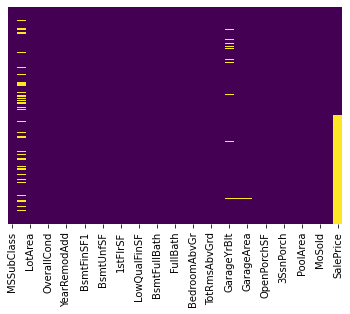

In [16]:
#check null by heatmap
sns.heatmap(df_int.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Correlation

In [25]:
X=df_int.drop(['SalePrice'],axis=1)
y=df_int['SalePrice']

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420
BsmtFinSF2,-0.072530,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,...,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883,-0.011378


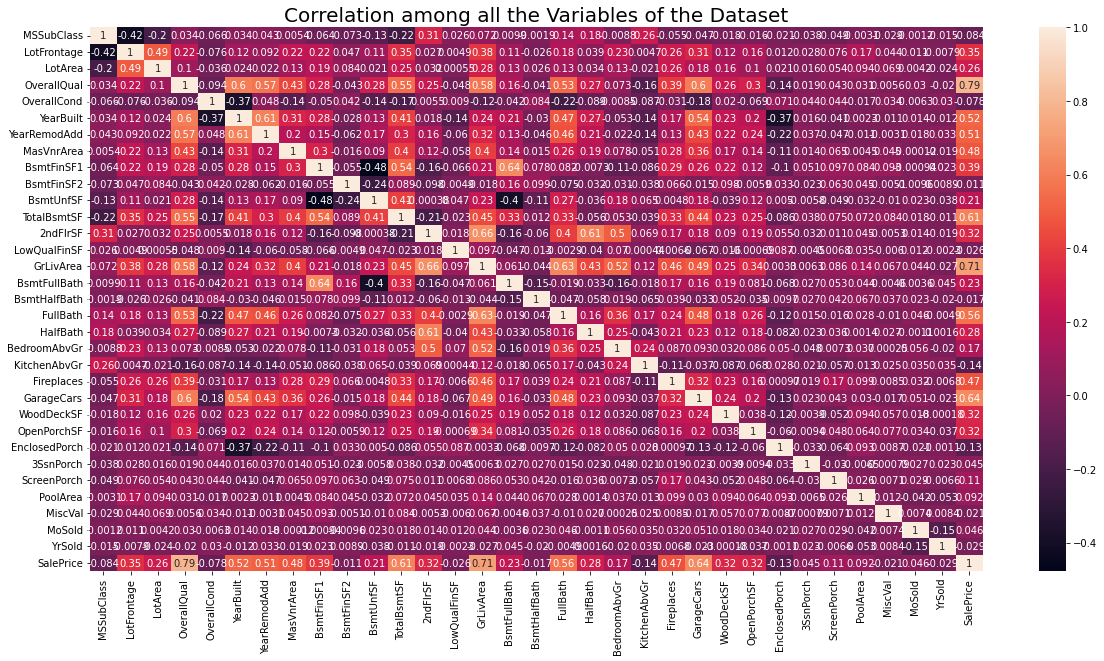

In [26]:
cor=df_int.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [27]:
def correla(data, threshold):
    col_corr=set() #set the all names of correlated cols
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features=correla(X,0.7)
print(corr_features)
len(set(corr_features))

set()


0

In [30]:
df_int=df_int.drop(corr_features,axis=1)

In [29]:
df_int.shape

(2919, 33)

In [32]:
df_int.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Mutual infromation - Regression

In [34]:
X=df_int.drop(['SalePrice'],axis=1)
y=df_int['SalePrice']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
train_x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1448,50,70.0,11767,4,7,1910,2000,0.0,0.0,0.0,...,1.0,168,24,0,0,0,0,0,5,2007
1397,70,51.0,6120,5,8,1920,2004,0.0,0.0,0.0,...,1.0,24,0,150,0,0,0,0,5,2007
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,2.0,298,0,0,0,0,0,0,5,2007
384,60,NaN,53107,6,5,1992,1992,0.0,985.0,0.0,...,2.0,216,231,0,0,0,0,0,6,2007
530,80,85.0,10200,6,5,1988,1989,219.0,783.0,0.0,...,2.0,224,0,0,0,0,0,0,8,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163.0,0.0,...,3.0,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442.0,0.0,...,2.0,290,0,0,0,0,0,0,2,2010
193,160,24.0,2308,6,5,1976,1976,0.0,306.0,0.0,...,2.0,108,0,0,0,0,0,0,9,2009
1147,20,61.0,33983,5,6,1977,1994,0.0,1112.0,0.0,...,2.0,690,90,0,0,0,0,0,5,2007


In [38]:
train_x.isnull().sum()

MSSubClass         0
LotFrontage      333
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
GarageCars         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
train_x.isnull().sum().sum()

In [ ]:
train_x=train_x.dropna(axis=1)
train_y=train_y.fillna(0)

In [40]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(train_x.fillna(0),train_y.fillna(0))
mutual_info

array([0.1181905 , 0.10736509, 0.08629649, 0.25877518, 0.0418469 ,
       0.18401271, 0.13217911, 0.08258719, 0.07816573, 0.        ,
       0.06781869, 0.17413647, 0.08565335, 0.00453926, 0.2492918 ,
       0.00600856, 0.00446415, 0.13771664, 0.06463504, 0.05712398,
       0.0310478 , 0.09395274, 0.18716545, 0.05303407, 0.05917004,
       0.01926454, 0.00826486, 0.03046397, 0.        , 0.0066963 ,
       0.00680222, 0.00680977])

In [41]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=train_x.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.258775
GrLivArea        0.249292
GarageCars       0.187165
YearBuilt        0.184013
TotalBsmtSF      0.174136
FullBath         0.137717
YearRemodAdd     0.132179
MSSubClass       0.118191
LotFrontage      0.107365
Fireplaces       0.093953
LotArea          0.086296
2ndFlrSF         0.085653
MasVnrArea       0.082587
BsmtFinSF1       0.078166
BsmtUnfSF        0.067819
HalfBath         0.064635
OpenPorchSF      0.059170
BedroomAbvGr     0.057124
WoodDeckSF       0.053034
OverallCond      0.041847
KitchenAbvGr     0.031048
ScreenPorch      0.030464
EnclosedPorch    0.019265
3SsnPorch        0.008265
YrSold           0.006810
MoSold           0.006802
MiscVal          0.006696
BsmtFullBath     0.006009
LowQualFinSF     0.004539
BsmtHalfBath     0.004464
BsmtFinSF2       0.000000
PoolArea         0.000000
dtype: float64

In [47]:
train_x=train_x.fillna(0)
train_y=train_y.fillna(0)

In [48]:
from sklearn.feature_selection import SelectPercentile
sel_top_col=SelectPercentile(mutual_info_regression,percentile=20)

sel_top_col.fit(train_x,train_y)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f4c3b4ef9e0>)

In [49]:
sel_top_col.get_support()

array([ True, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False])

In [55]:
col=train_x.columns[sel_top_col.get_support()]
col

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars'],
      dtype='object')

In [56]:
train_x=train_x.drop(col,axis=1)
test_x=test_x.drop(col,axis=1)

In [60]:
test_x.isnull().sum()

LotFrontage      153
LotArea            0
OverallCond        0
YearRemodAdd       0
MasVnrArea         9
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
2ndFlrSF           0
LowQualFinSF       0
BsmtFullBath       0
BsmtHalfBath       0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [63]:
df_int=train_x

In [62]:
from sklearn.linear_model import LogisticRegression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1,max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x.fillna(0))
lr_acc_score = accuracy_score(test_y.fillna(0), lr_predict)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 43.72146118721461 



In [64]:
df_int.shape

(2043, 25)

In [66]:
df_int.isnull().sum()

LotFrontage      0
LotArea          0
OverallCond      0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [68]:
df_int.columns

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [70]:
extracted_col = df["SalePrice"]  
df_final = df_int.join(extracted_col)

In [71]:
df_final.isnull().sum()

LotFrontage         0
LotArea             0
OverallCond         0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
2ndFlrSF            0
LowQualFinSF        0
BsmtFullBath        0
BsmtHalfBath        0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
Fireplaces          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        2042
dtype: int64

In [76]:
df_final["SalePrice"]=df_final["SalePrice"].fillna(df_final["SalePrice"].mode()[0])

In [77]:
X=df_final.drop(['SalePrice'],axis=1)
y=df_final['SalePrice']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
from sklearn.linear_model import LogisticRegression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1,max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 46.00326264274062 



In [82]:
col

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars'],
      dtype='object')

In [83]:
df=df[col]

In [84]:
df.shape

(2919, 7)

In [87]:
df_final.columns

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [91]:
extracted_col = df_final["SalePrice"]  
df = df.join(extracted_col)

In [93]:
df.columns

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'SalePrice'],
      dtype='object')

In [104]:
df["SalePrice"]=df["SalePrice"].fillna(df["SalePrice"].mode()[0])
df["TotalBsmtSF"]=df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mode()[0])
df["GarageCars"]=df["GarageCars"].fillna(df["GarageCars"].mode()[0])

In [105]:
df.isnull().sum()

MSSubClass     0
OverallQual    0
YearBuilt      0
TotalBsmtSF    0
GrLivArea      0
FullBath       0
GarageCars     0
SalePrice      0
dtype: int64

In [106]:
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [107]:
from sklearn.linear_model import LogisticRegression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1,max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 51.462450592885375 

